## On progress - H3 encoding

In [177]:

import json

import pygeohash as pgh
import subprocess
import geopandas as gpd
import pandas as pd
import os
import sys
sys.path.append("../")
from geohashtree.geohashtree import LiteTreeOffset, LiteTreeCID, FullTreeFile,append_h3_to_dataframe,append_geohash_to_dataframe
from geohashtree.filesystem import ipfs_add_feature,ipfs_add_index_folder,ipfs_binary

In [191]:
asset = "dc_restaurants"
geojson_path = f"../assets/{asset}.geojson"
index_path = f"../data/geohash_offset_{asset}/h3_index"

In [192]:
#sort records by geohashes / h3
gdf = gpd.read_file(geojson_path)
cols = gdf.columns

In [193]:
gdf.to_parquet(f"../assets/{asset}.parquet")

In [194]:
gdf = append_geohash_to_dataframe(gdf,precision=5)


In [195]:
gdf

,full_id,osm_id,osm_type,amenity,atm,opening_hours:bar,survey:date,brewery,payment:cheque,tourism,...,addr:street,addr:state,addr:postcode,addr:housenumber,addr:city,entrance,geometry,x,y,geohash
0,n255342748,255342748,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,yes,POINT (-76.94680 38.99221),-76.946801,38.992208,dqcmc
1,n255342809,255342809,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,emergency,POINT (-76.94647 38.99222),-76.946472,38.992217,dqcmc
2,n258062907,258062907,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,Burke Centre Parkway,VA,22015,6003,Burke,NaN,POINT (-77.29676 38.78693),-77.296758,38.786931,dqch9
3,n260321689,260321689,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,yes,POINT (-76.94334 38.98321),-76.943338,38.983212,dqcmc
4,n260321700,260321700,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,yes,POINT (-76.94354 38.98330),-76.943537,38.983299,dqcmc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670,n11275845269,11275845269,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,Arlington Boulevard,VA,22042,7236,NaN,NaN,POINT (-77.19543 38.86694),-77.195429,38.866937,dqcj5
2671,n11282521337,11282521337,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,Little River Turnpike,VA,NaN,7438,NaN,NaN,POINT (-77.20221 38.83249),-77.202206,38.832492,dqchg
2672,n11285160608,11285160608,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,New Jersey Avenue Northwest,NaN,NaN,1545,NaN,NaN,POINT (-77.01643 38.91095),-77.016429,38.910949,dqcjr
2673,n11286073597,11286073597,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,K Street Northwest,NaN,NaN,1108,NaN,NaN,POINT (-77.02754 38.90226),-77.027543,38.902256,dqcjr


In [186]:
gdf.sort_values('geohash')[cols].to_file(f"../assets/{asset}_gh_sorted.geojson",driver="GeoJSON")

In [187]:

geojson_path = f"../assets/{asset}_gh_sorted.geojson"
index_path = f"../data/geohash_offset_{asset}_gh_sorted/index"

In [188]:
offsettree = LiteTreeOffset(grid='geohash')
offsettree.add_from_geojson(geojson_path,precision=5)
offsettree.generate_tree_index(index_path)

Index Mode: offline
bafybeia2el6koj4axa6fhg7o6wdouvttzdvtqd4ty7bddi7yf2mcwebfsi


In [189]:
ipfs_add_index_folder(index_path)

'bafybeigoveu253bxkmz3qbhxjn6kqju5vrcqtjqm2wqrhtxtmaxck5g2ci'

In [190]:
ipfs_add_feature(geojson_path)

'bafybeia2el6koj4axa6fhg7o6wdouvttzdvtqd4ty7bddi7yf2mcwebfsi'

In [ ]:
gdf = append_h3_to_dataframe(gdf,precision=6)

gdf.sort_values('geohash')[cols].to_file(f"../assets/{asset}_h3_sorted.geojson",driver="GeoJSON")

In [81]:
asset = "dc_restaurants_h3_sorted"
geojson_path = f"../assets/{asset}.geojson"
index_path = f"../data/geohash_offset_{asset}/h3_index"

In [82]:
offsettree = LiteTreeOffset(grid='h3')
offsettree.add_from_geojson(geojson_path,precision=6)
offsettree.generate_tree_index(index_path)

Index Mode: offline
bafybeih3dl46npkvjibu3xzyqcvzbkmjfpbtqfv7rdmzcwfjozxnun66t4


In [83]:
ipfs_add_index_folder(index_path)

'bafybeiakrsbotrovau2syhfeerthkwqpopytap3onydyvvppky6gvcqn54'

In [84]:
ipfs_add_feature(geojson_path)

'bafybeih3dl46npkvjibu3xzyqcvzbkmjfpbtqfv7rdmzcwfjozxnun66t4'

In [7]:
cid = "bafybeia7jlkyzt22qgh66felldr322l5c7jdvm4xspr222f4usnd2ttbze"
index_cid = "bafybeiel6r6oci5w26llgnppdtf6zyimbtkswav2apfi3xqpxalwftquii"

In [152]:
centre = (38.99752107280757,-77.06817861047044)
precision = 6
radius = 111000*0.05

In [52]:
radius_km = radius / 1000.0
import h3    
# Get the center hexagon index
center_hex = h3.geo_to_h3(*centre, precision)

# Get the hexagons covering the circle
covering = h3.hex_range_distances(center_hex, int(radius_km))

In [58]:
h3_list = [x for xs in covering for x in xs]

In [59]:
from geohashtree.geohash_func import h3_to_h3tree

In [60]:
h3tree_list = list(map(h3_to_h3tree,h3_list))

In [62]:
h3_list

['862aa840fffffff',
 '862aa8457ffffff',
 '862aa8407ffffff',
 '862aa842fffffff',
 '862aa84e7ffffff',
 '862aa841fffffff',
 '862aa8477ffffff',
 '862aa855fffffff',
 '862aa84efffffff',
 '862aa8557ffffff',
 '862aa84afffffff',
 '862aa8417ffffff',
 '862aa8427ffffff',
 '862aa8437ffffff',
 '862aa845fffffff',
 '862aa8447ffffff',
 '862aa84f7ffffff',
 '862aa84c7ffffff',
 '862aa8467ffffff',
 '862aa87a7ffffff',
 '862aa848fffffff',
 '862aa84dfffffff',
 '862aa84cfffffff',
 '862aa8097ffffff',
 '862aa84d7ffffff',
 '862aa8487ffffff',
 '862aa846fffffff',
 '862aa854fffffff',
 '862aa87b7ffffff',
 '862aa851fffffff',
 '862aa844fffffff',
 '862aa850fffffff',
 '862aa858fffffff',
 '862aa85afffffff',
 '862aa8547ffffff',
 '862aa8577ffffff',
 '862aa84a7ffffff']

In [63]:
h3_compact = h3.compact(h3_list)

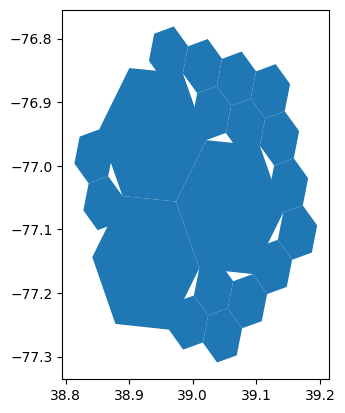

In [65]:
import h3
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

def h3_to_polygon(h3_index):
    vertices = h3.h3_to_geo_boundary(h3_index)
    polygon = Polygon(vertices)
    return polygon

def h3_to_geodataframe(h3_indexes):
    polygons = [h3_to_polygon(h) for h in h3_indexes]
    gdf = gpd.GeoDataFrame(geometry=polygons)
    return gdf

# Example list of H3 indexes
h3_indexes = h3_compact
# Convert H3 indexes to GeoDataFrame
gdf = h3_to_geodataframe(h3_indexes)

# Plot GeoDataFrame
gdf.plot()
plt.show()


In [28]:
center_hex,covering

('882aa840a3fffff',
 [{'882aa840a3fffff'},
  {'882aa840a1fffff',
   '882aa840a7fffff',
   '882aa840abfffff',
   '882aa840b5fffff',
   '882aa840bdfffff',
   '882aa84e49fffff'},
  {'882aa84085fffff',
   '882aa84087fffff',
   '882aa840a5fffff',
   '882aa840a9fffff',
   '882aa840adfffff',
   '882aa840b1fffff',
   '882aa840b7fffff',
   '882aa840b9fffff',
   '882aa8419bfffff',
   '882aa84e41fffff',
   '882aa84e4bfffff',
   '882aa84e4dfffff'}])

In [95]:
def h3_covering_circle(lat, lng, radius, resolution):
    # Convert radius from meters to kilometers
    radius_km = radius / 1000.0
    
    # Get the center hexagon index
    center_hex = h3.geo_to_h3(lat, lng, resolution)
    
    # Get the hexagons covering the circle
    covering = h3.k_ring_distances(center_hex, int(radius_km), max_distance=0)
    
    return covering

In [91]:
result_hashes = geohashes_covering_circle(*centre,radius,precision)

NameError: name 'geohashes_covering_circle' is not defined

In [115]:
centre

(38.99752107280757, -77.06817861047044)

In [151]:
radius

0.05

In [168]:
h3.edge_length(precision)*2

6.458965544

In [169]:
def h3tree_covering_circle(yc,xc,radius,precision):
    radius_km = radius / 1000.0
    print(yc,xc)
    center_hex = h3.geo_to_h3(yc,xc,precision)
    print(center_hex)
    # Get the average cell edge length for the given origin index
    edge_length_km = h3.edge_length(precision)*2
    
    # Calculate the ring size based on the radius and average edge length
    ring_size = int(radius_km / edge_length_km)+1
    covering = h3.hex_range_distances(center_hex, ring_size)
    h3list = list(map(h3_to_h3tree,[_x for _set in covering for _x in _set]))
    return h3list

In [167]:
radius

5550.0

In [170]:
result_hashes = h3tree_covering_circle(*centre,radius, precision)

38.99752107280757 -77.06817861047044
862aa840fffffff
5


In [171]:
result_hashes

['62aa840',
 '62aa8457',
 '62aa8407',
 '62aa842',
 '62aa84e7',
 '62aa841',
 '62aa8477']

In [173]:
from geohashtree.geohash_func import h3tree_to_h3
def h3_to_gdf(h3str):
    vertices = h3.h3_to_geo_boundary(h3str)
    vertices = tuple(coord[::-1] for coord in vertices)
    gdf = gpd.GeoDataFrame({'geometry': [Polygon(vertices)],'h3': [h3str]},crs="EPSG:4326")
    return gdf
h3_gdf = pd.concat([h3_to_gdf(h3tree_to_h3(h3t)) for h3t in result_hashes])


In [174]:
h3_gdf

,geometry,h3
0,"POLYGON ((-77.03365 39.03535, -77.07626 39.026...",862aa840fffffff
0,"POLYGON ((-77.01369 38.98199, -77.05626 38.973...",862aa8457ffffff
0,"POLYGON ((-77.05365 39.08875, -77.09631 39.080...",862aa8407ffffff
0,"POLYGON ((-76.97966 39.07459, -77.02232 39.066...",862aa842fffffff
0,"POLYGON ((-77.08754 38.99612, -77.13011 38.987...",862aa84e7ffffff
0,"POLYGON ((-77.10759 39.04948, -77.15021 39.041...",862aa841fffffff
0,"POLYGON ((-76.95974 39.02118, -77.00236 39.012...",862aa8477ffffff


/var/folders/6s/50fzkjrx159f42s0rpvmm4180000gn/T/ipykernel_6191/1024330113.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_radius = gdf_rand_points.buffer(radius)


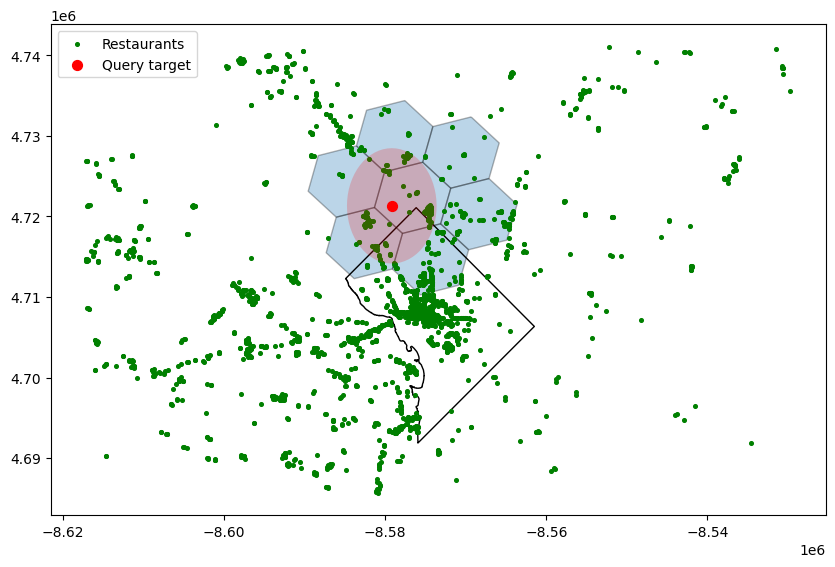

In [175]:
# Plot the bounding box and the random points
dc_outline = gpd.read_file("../../data/maryland_demo/Washington_DC_Boundary.geojson")
gdf_rand_points = gpd.read_file("../../data/maryland_demo/rand_dc_point.geojson")
radius = 0.05
gdf_radius = gdf_rand_points.buffer(radius)
df_wm = h3_gdf.to_crs(epsg=3857)
ax = df_wm.plot(figsize=(10, 10), alpha=0.3, edgecolor="k")
dc_outline.to_crs(epsg=3857).plot(ax=ax, facecolor='none',edgecolor="k")
gdf.to_crs(epsg=3857).plot(ax=ax, color='green', markersize=7, label='Restaurants')
gdf_rand_points.to_crs(epsg=3857).plot(ax=ax, color='red', markersize=50, label='Query target')
gdf_radius.to_crs(epsg=3857).plot(ax=ax,alpha=0.2,color='red')


ax.legend()
plt.show()